<a href="https://colab.research.google.com/github/Foco22/BECAS_MAGISTER/blob/master/AnalisisBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "camelot-py[cv]"

     |████████████████████████████████| 51kB 1.5MB/s 
     |████████████████████████████████| 5.6MB 5.6MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 2.6MB 32.5MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=c304181e8f36099b9b2f67969efd25a730c3441aca4cb70c1b3f775c2537dc38
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [2]:
!apt install python3-tk ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 39 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 

In [3]:
import camelot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***Exportacion y Preparacion de los datos***


In [4]:
def extraccion_informacion():

    from google.colab import files
    uploaded = files.upload()  

    tables = camelot.read_pdf('RES_FALLO_MAG_7088_2019.pdf', pages='34-61')

    #Se exporta todos los archivos a un csv, para luego unirlos
    tables.export('puntajes_mg.csv', f='csv', compress=True)

    conteo_1 = 0
    for x in tables:
        conteo_1 = conteo_1 +1 
        x.to_csv('pagina {}.csv'.format(conteo_1)) 

    
    lista_dataframes = []
    archivos = 0
    for x in range(1,49):
        archivos = archivos +1 
        lista_dataframes.append('pagina {}.csv'.format(archivos))

    
    df = pd.DataFrame()
    for file in lista_dataframes:
         df = pd.concat([df, pd.read_csv(file)], ignore_index=True)
      
    return df

In [67]:
df_datos = extraccion_informacion()

Saving RES_FALLO_MAG_7088_2019.pdf to RES_FALLO_MAG_7088_2019 (3).pdf


In [69]:
df_datos.drop('Unnamed: 0', inplace = True, axis = 1)
df_datos.drop('Unnamed: 1', inplace = True, axis = 1)

In [70]:
df_datos.head()

,#,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,PUNTAJE
0,1.0,73200308.0,FEMENINO,AGUILAR PLAZA CAMILA ANDREA,FUERA DE BASES,NaN,NaN
1,2.0,73200230.0,FEMENINO,AGUILERA MOLINA FLORENCIA,FUERA DE BASES,NaN,NaN
2,3.0,73200353.0,MASCULINO,AGURTO SAEZ CRISTOBAL ANDRES,FUERA DE BASES,NaN,NaN
3,4.0,73200590.0,FEMENINO,ALARCON AVILA ANAIS NATALIA,FUERA DE BASES,NaN,NaN
4,5.0,73201192.0,MASCULINO,ALARCON ROJAS JAVIER EDUARDO,FUERA DE BASES,NaN,NaN


# ***Analisis y Exploracion de los datos***



In [74]:
df_datos.head()

,#,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,PUNTAJE
0,1.0,73200308.0,FEMENINO,AGUILAR PLAZA CAMILA ANDREA,FUERA DE BASES,NaN,NaN
1,2.0,73200230.0,FEMENINO,AGUILERA MOLINA FLORENCIA,FUERA DE BASES,NaN,NaN
2,3.0,73200353.0,MASCULINO,AGURTO SAEZ CRISTOBAL ANDRES,FUERA DE BASES,NaN,NaN
3,4.0,73200590.0,FEMENINO,ALARCON AVILA ANAIS NATALIA,FUERA DE BASES,NaN,NaN
4,5.0,73201192.0,MASCULINO,ALARCON ROJAS JAVIER EDUARDO,FUERA DE BASES,NaN,NaN


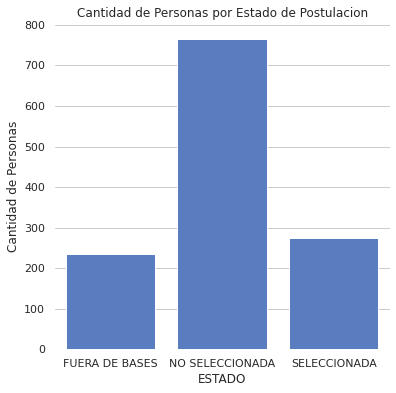

In [89]:
plt.figure(figsize=(6,6))
sns.set_color_codes("muted")

sns.set_style('whitegrid')
g = sns.barplot(y="FOLIO", x="ESTADO", data=df_datos.groupby('ESTADO').count()['FOLIO'].reset_index(),
            label="SELECCIONADA", color="b")
plt.title('Cantidad de Personas por Estado de Postulacion')
plt.ylabel('Cantidad de Personas')
sns.despine(left=True, bottom=True)

In [ ]:
df_datos.groupby('ESTADO').count()['FOLIO']

In [ ]:
# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05)
 
plot.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


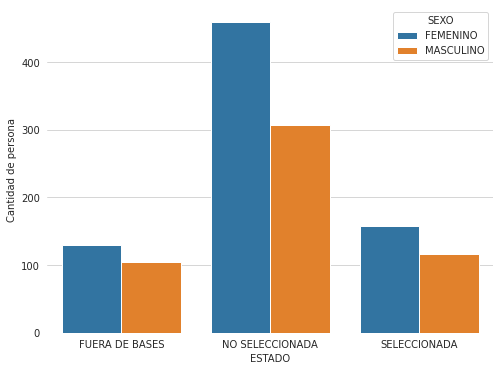

In [76]:
plt.figure(figsize=(8,6))

sns.set_style('whitegrid')
sns.countplot(x= 'ESTADO', data = df_datos, hue = 'SEXO')
plt.ylabel('Cantidad de persona')
sns.despine(left=True, bottom=True)

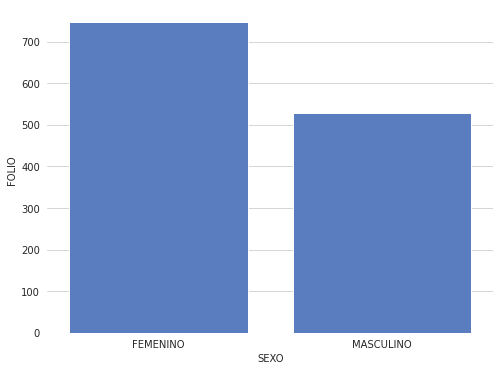

In [77]:
plt.figure(figsize=(8,6))
sns.set_color_codes("muted")

sns.set_style('whitegrid')
g = sns.barplot(y="FOLIO", x="SEXO", data=df_datos.groupby('SEXO').count()['FOLIO'].reset_index(),
            label="SELECCIONADA", color="b")
sns.despine(left=True, bottom=True)

In [78]:
df_sele = df_datos.loc[df_datos['ESTADO'] != 'FUERA DE BASES']
df_sele.head()

,#,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,PUNTAJE
234,1.0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,"4,618"
235,2.0,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,"4,617"
236,3.0,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,"4,615"
237,4.0,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,"4,614"
238,5.0,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,"4,614"


In [79]:
len(df_sele)

1041

Text(0, 0.5, 'Cantidad de persona')

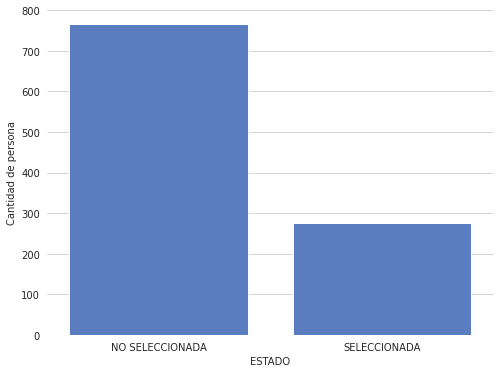

In [80]:
plt.figure(figsize=(8,6))

sns.set_color_codes("muted")

sns.set_style('whitegrid')

g = sns.barplot(y="FOLIO", x="ESTADO", data=df_sele.groupby('ESTADO').count()['FOLIO'].reset_index(),
            label="SELECCIONADA", color="b")
sns.despine(left=True, bottom=True)
plt.ylabel('Cantidad de persona')

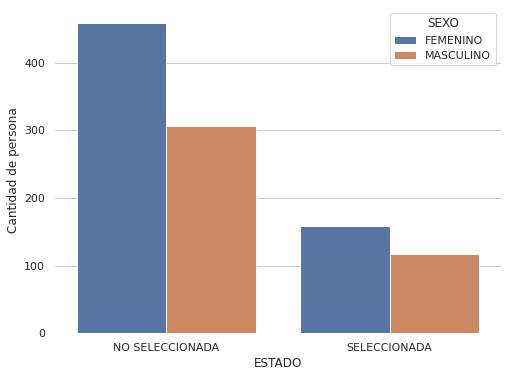

In [81]:
plt.figure(figsize=(8,6))
sns.set()

sns.set_style('whitegrid')
sns.countplot(x= 'ESTADO', data = df_sele, hue = 'SEXO')
plt.ylabel('Cantidad de persona')
sns.despine(left=True, bottom=True)

In [82]:
df_sele.groupby(['SEXO','ESTADO']).count()['FOLIO']/len(df_sele)*100

SEXO       ESTADO         
FEMENINO   NO SELECCIONADA    44.092219
           SELECCIONADA       15.177714
MASCULINO  NO SELECCIONADA    29.490874
           SELECCIONADA       11.239193
Name: FOLIO, dtype: float64

In [83]:
dummies = pd.get_dummies(df_sele['ESTADO'])
df_sele = pd.concat([df_sele, dummies], axis=1, sort=False)


In [84]:
pivot = df_sele.pivot_table(index=['INSTITUCION DE DESTINO'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA']
pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)
pivot['% Aceptados'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
pivot = pivot.reset_index()

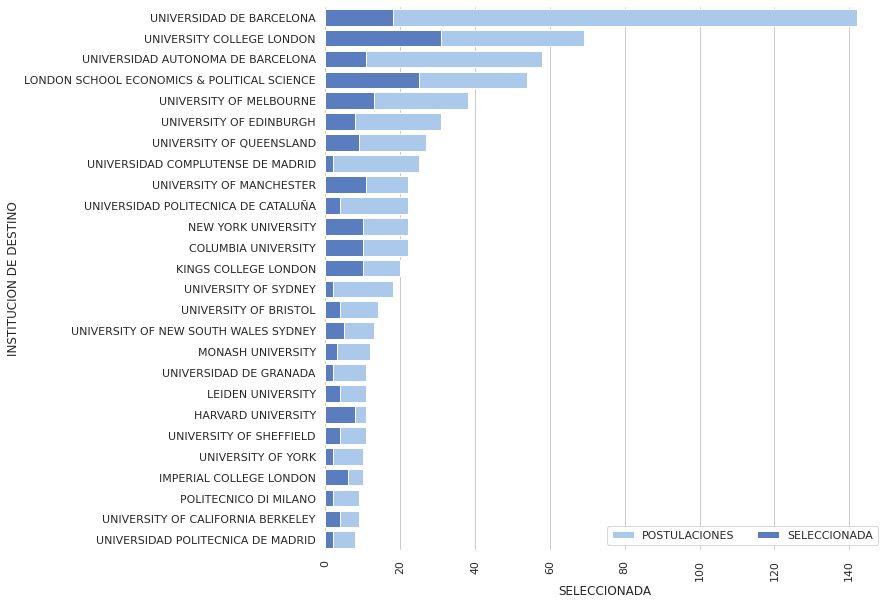

In [85]:
#25 univesidades con mas postulaciones
pivot_25 = pivot[:26]
pivot_25

f, ax = plt.subplots(figsize=(10, 10))

sns.set_color_codes("pastel")

g = sns.barplot(y='INSTITUCION DE DESTINO', x="POSTULACIONES", data=pivot_25,
            label="POSTULACIONES", color="b")

sns.set_color_codes("muted")
g = sns.barplot(y="INSTITUCION DE DESTINO", x="SELECCIONADA", data=pivot_25,
            label="SELECCIONADA", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

plt.xticks(rotation=90)

sns.despine(left=True, bottom=True)

In [86]:
pivot_25 = pivot_25[:10]
pivot_25

import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(pivot_25, x="SELECCIONADA", y="% Aceptados",
	         size='POSTULACIONES', color="INSTITUCION DE DESTINO", template = 'none',
                  size_max=70)

fig.show()

In [87]:
#f, ax = plt.subplots(figsize=(10, 10))


#
#pivot_25 = pivot_25.sort_values(by=['% Aceptados'], ascending=False)

#g = sns.barplot(y='INSTITUCION DE DESTINO', x="% Aceptados", data=pivot_25,
#            label="% Aceptacion", color="b")

#plt.legend()
#sns.despine(left=True, bottom=True)
#plt.xticks(rotation=90)

# **Analisis por Paises**




In [95]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
universidad = pd.read_csv(io.BytesIO(uploaded['mapeo_universidades.csv']), sep =';')
# Dataset is now stored in a Pandas Dataframe

#universidad = universidad.iloc[:,1:3]
universidad.head()

In [ ]:
len(universidad)

In [ ]:
resultado = pd.merge(df_sele, universidad, how='left', on=['INSTITUCION DE DESTINO'])

In [ ]:
resultado = resultado.loc[resultado['country'] != 'NO']
resultado

In [ ]:
resultados_f = resultado.groupby('country').count()['FOLIO'].reset_index()

In [ ]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio

# 1) Infection Rates
fig_cases = go.Figure(data = go.Choropleth(locations = resultados_f['country'],
                                     z = resultados_f['FOLIO'],
                                     locationmode = 'country names',
                                     colorscale = 'Blues',
                                     colorbar_title = "Infections"))

fig_cases.update_layout(title_text = 'Cantidad de Postulante por pais',
                  geo = dict(showframe = False,
                           showcoastlines = False,
                           projection_type = 'equirectangular'))


In [ ]:
resultado

f, ax = plt.subplots(figsize=(10, 6))

sns.set_color_codes("pastel")

g = sns.barplot(x='country', y="Postulante", data=resultado,
            label="Postulante", color="b")

sns.set_color_codes("muted")
g = sns.barplot(x="country", y="SELECCIONADA", data=resultado,
            label="Seleccionados", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)

plt.xticks(rotation=90)

sns.despine(left=True,top = True,bottom = False)


In [ ]:
#resultado.pivot_table(index=['INSTITUCION DE DESTINO'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
dummies = pd.get_dummies(resultado['ESTADO'])
resultado = pd.concat([resultado, dummies], axis=1, sort=False)
#resultado

l


In [ ]:
resultado = resultado.pivot_table(index=['country'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum').reset_index()

resultado['Postulante'] = resultado['NO SELECCIONADA'] + resultado['SELECCIONADA']

resultado['% Aceptacion'] = round(resultado['SELECCIONADA']/resultado['Postulante'],3)*100

resultado = resultado.sort_values(by ='Postulante', ascending = False)

resultado.head()

In [ ]:
resultado = resultado[:10]

In [ ]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(resultado, x="SELECCIONADA", y="% Aceptacion",
	         size='Postulante', color="country", template = 'none',
                  size_max=80)

fig.show()

# **Analisis de Puntajes por Universidad y Paises**


In [ ]:
resultado.head()

,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,PUNTAJE,NO SELECCIONADA,SELECCIONADA,country
0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,"4,618",1,0,USA
1,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,"4,617",1,0,Brazil
2,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,"4,615",1,0,Australia
3,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,"4,614",1,0,United Kingdom
4,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,"4,614",1,0,Australia


In [20]:
def string_numero():
    cantidad = 0
    valores = []
    resultado['PUNTAJE_NUMERO'] = 0
    for i in resultado['PUNTAJE']:
       numero = ''
       numero_lista = list(i)
       for x in numero_lista:
            if x != ',':
              numero = numero + x
        
       numero = float(numero)/1000
       #print(numero)
       #resultado['PUNTAJE_NUMERO'][cantidad] = numero
       valores.append(numero)
       cantidad = cantidad + 1
    
    valores = pd.DataFrame(valores, columns =['PUNTAJES_NUMERO'])
    return valores
string_numero()

,PUNTAJES_NUMERO
0,4.618
1,4.617
2,4.615
3,4.614
4,4.614
...,...
1008,4.620
1009,4.620
1010,4.619
1011,4.619


In [21]:
df_puntajes = string_numero()
df_puntajes

,PUNTAJES_NUMERO
0,4.618
1,4.617
2,4.615
3,4.614
4,4.614
...,...
1008,4.620
1009,4.620
1010,4.619
1011,4.619


In [22]:
#resultado = pd.concat([resultado, df_puntajes], axis=1, sort=False)
#resultado

resultado = resultado.reset_index()


In [23]:
resultado = pd.concat([resultado, df_puntajes], axis=1, sort=False)

In [25]:
resultado.drop('PUNTAJE', inplace = True, axis = 1)

In [26]:
resultado.drop('PUNTAJE_NUMERO', inplace = True, axis = 1)

In [29]:
resultado.head()

,index,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,NO SELECCIONADA,SELECCIONADA,country,PUNTAJES_NUMERO
0,0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,1,0,USA,4.618
1,1,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,1,0,Brazil,4.617
2,2,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,1,0,Australia,4.615
3,3,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,1,0,United Kingdom,4.614
4,4,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,1,0,Australia,4.614


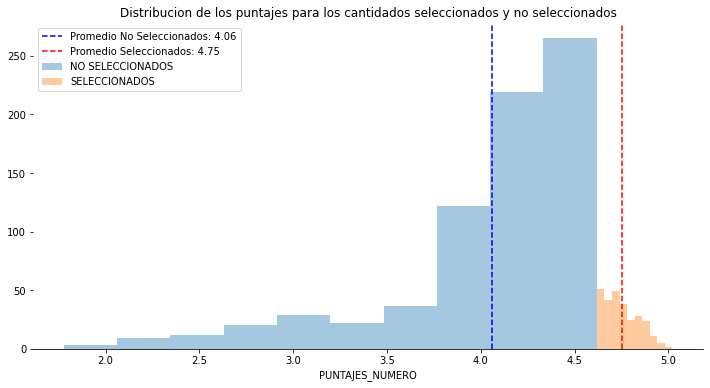

In [28]:
plt.figure(figsize= (12,6))

sns.distplot(resultado.loc[resultado['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'], kde = False, bins = 10, label = 'NO SELECCIONADOS')
sns.distplot(resultado.loc[resultado['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'], kde = False, bins = 10, label = 'SELECCIONADOS')

promedio_no = round(resultado.loc[resultado['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'].mean(),2)

promedio_si = round(resultado.loc[resultado['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'].mean(),2)

plt.axvline(x=resultado.loc[resultado['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'].mean(), color='b', linestyle='--', label = 'Promedio No Seleccionados: {}'.format(promedio_no))
plt.axvline(x=resultado.loc[resultado['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'].mean(), color='r', linestyle='--', label = 'Promedio Seleccionados: {}'.format(promedio_si))

plt.title('Distribucion de los puntajes para los cantidados seleccionados y no seleccionados')

plt.legend()

sns.despine(left=True,top = True,bottom = False)

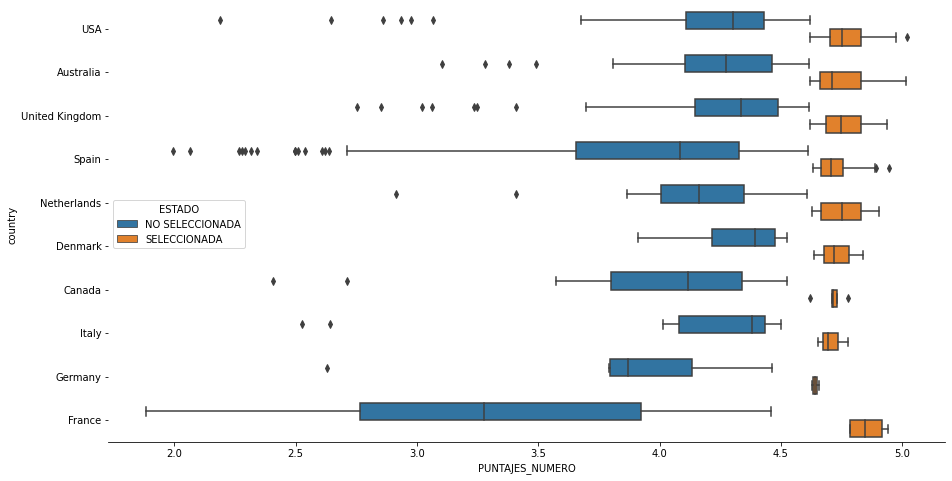

In [ ]:
paises_10 = list(resultado.groupby('country').count()['FOLIO'].reset_index().sort_values(by='FOLIO', ascending = False)[:10]['country'])

resultado = resultado[resultado['country'].isin(paises_10)]
plt.figure(figsize= (15,8))
sns.boxplot(x = 'PUNTAJES_NUMERO', y = 'country', hue = 'ESTADO', data = resultado)
sns.despine(left=True,top = True,bottom = False)

In [30]:
mini_puntaje = resultado.loc[resultado['ESTADO'] =='SELECCIONADA'].groupby('country').min()['PUNTAJES_NUMERO'].reset_index()

resultado.head()

,index,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,NO SELECCIONADA,SELECCIONADA,country,PUNTAJES_NUMERO
0,0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,1,0,USA,4.618
1,1,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,1,0,Brazil,4.617
2,2,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,1,0,Australia,4.615
3,3,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,1,0,United Kingdom,4.614
4,4,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,1,0,Australia,4.614


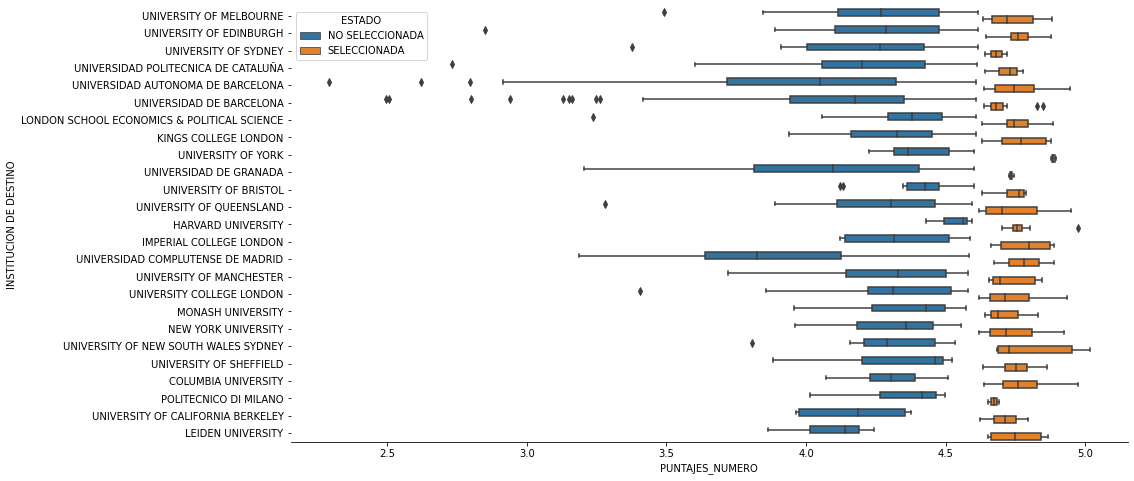

In [47]:
universidad_25 = list(resultado.groupby('INSTITUCION DE DESTINO').count()['FOLIO'].reset_index().sort_values('FOLIO', ascending = False)[:25]['INSTITUCION DE DESTINO'])

resultado_25 = resultado[resultado['INSTITUCION DE DESTINO'].isin(universidad_25)]
plt.figure(figsize= (15,8))
sns.boxplot(x = 'PUNTAJES_NUMERO', y = 'INSTITUCION DE DESTINO', hue = 'ESTADO', data = resultado_25)
sns.despine(left=True,top = True,bottom = False)
